In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 02-06-2025: Quality Control

## GToTree Genomes_summary_info.tsv

We looked at the summary from GToTree to find out how complete the single copy genes in our genomes are compared to the GTDB. In particular, we tried to see whether complete genomes had different completeness and redundancy percentages than incomplete genomes.


In [66]:
df = pd.read_table("data/gtotree/Genomes_summary_info.tsv")
df["is_complete"] = ["Yes","No","Yes","Yes","Yes","Yes","No","Yes","Yes","Yes","Yes","No","Yes","No","No","No","No"]
df["is_endosymb"] = ["No","Yes","Yes","Yes","Yes","No","Yes","Yes","No","Yes","No","Yes","Yes","Yes","Yes","Yes","Yes"]



df


,assembly_id,taxid,num_SCG_hits,uniq_SCG_hits,perc_comp,perc_redund,num_SCG_hits_after_len_filt,in_final_tree,GTDB_accession,GTDB_domain,GTDB_phylum,GTDB_class,GTDB_order,GTDB_family,GTDB_genus,GTDB_species,is_complete,is_endosymb
0,Dickeya_dadantii_XJ12_GCF_030168535.1,NaN,167,163,97.09,2.33,162,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No
1,Doolittlea_endobia_DEMHIR_GCF_900039485.1,NaN,110,110,63.95,0.00,105,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes
2,Gullanella_endobia_GEFVIR_GCF_900048035.1,NaN,106,106,61.63,0.00,105,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes
3,Mikella_endobia_mEPMAR_GCF_900048045.1,NaN,75,75,43.60,0.00,72,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes
4,Moranella_endobia_GCF_000364725.1,NaN,96,96,55.81,0.00,95,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes
5,Pectobacterium_cacticida_CFBP3628_GCF_036885195.1,NaN,170,169,98.84,0.58,167,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No
6,Sodalis_endolongispinus_SOD1_GCF_018777395.1,NaN,167,158,97.09,5.81,152,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes
7,Sodalis_glossinidius_morsitans_GCF_000010085.1,NaN,169,168,98.26,1.16,165,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes
8,Sodalis_ligni_dw23_GCF_016865525.2,NaN,168,161,97.67,4.07,157,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No
9,Sodalis_pierantonius_SOPE_GCF_000517405.1,NaN,164,156,95.35,5.81,153,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

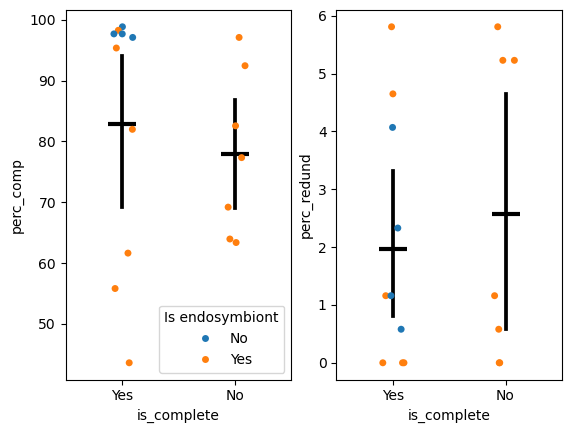

In [58]:
fig, axes = plt.subplots(1,2)

sns.stripplot(data=df,x="is_complete",y="perc_comp",hue="is_endosymb", ax = axes[0])
sns.pointplot(data=df,x="is_complete",y="perc_comp",linestyle="none",errorbar="ci",marker="_",markersize=20,markeredgewidth=3,ax=axes[0],color="black")

sns.stripplot(data=df,x="is_complete",y="perc_redund",hue="is_endosymb", ax = axes[1],legend=False)
sns.pointplot(data=df,x="is_complete",y="perc_redund",linestyle="none", errorbar="ci", marker="_",markersize=20,markeredgewidth=3,ax=axes[1],color="black")

handles, labels = axes[1].get_legend_handles_labels()
axes[0].legend(title="Is endosymbiont", loc='lower right')

plt.tight_layout

The free-living, complete genomes have a completion percentage that's close to 100%. The endosymbiotic completed genomes can have completion percentages as low as 43%. Looking at the 95% CI error bars, there's no significant difference in completion percentage between complete and incomplete genomes. 

Redundancy percentages are generally below 6% and do not differ significantly between complete and incomplete genomes.



# 04-06-2025: Phylogeny
Here we try to make a phylogeny from the concatenated SCGs in Aligned_SCGs.faa. We will first run IQtree without trimming the alignment, and then compare the result with a trimmed alignment.

## Running IQ-TREE 2.3.6 without trimming
As a first test, we ran 

```f=Aligned_SCGs.faa```

```iqtree -s $f -m LG+G4+F -pre $f.LGG4F``` (that takes a long time fml)

This showed the alignment has 38047 amino-acid sites, of which 8540 were parsimony-informative, 10379 were singleton sites, and 19127 were constant sites. 

There was also one sequence, Mikella_endobia_mEPMAR_GCF_900048045.1, that was formed by more than 50% gaps. However, we will not remove this sequence, because it's complete and might've lost many genes as an endosymbiont.

We viewed the obtained Aligned_SCGs.faa.LGG4F.treefile in figtree and rooted between Sodalis and the two related species (Dickeya and Pectobacterium). We based this root on _The genus Sodalis as a resource for understanding the multifaceted evolution of bacterial symbiosis in insects._ ([1](https://doi.org/10.1007/s13199-023-00966-0)). 

![alt text](figures/Aligned_SCPs.faa.LGG4F.treefile.png "Title")

The obtained tree looks similar to the tree in the publication, so it should generally be in the right direction.

## With trimming
To trim the sites containing over 50% gaps, we ran trimAl v1.5.rev0:

```trimal -in Aligned_SCGs.faa -out Aligned_SCGs.faa.trimal05 -gt 0.5```

We then ran IQ-TREE again, but now with more threads

```ft=Aligned_SCGs.faa.trimal05```

```iqtree -s $ft -m LG+G4+F -nt AUTO -pre $ft.LGG4F```

This showed that the trimmed alignment has 30635 sites, with 7459 parsimony-informative sites, 8861 singleton sites and 14315 constant sites.

![alt text](figures/Aligned_SCGs.faa.trimal05.LGG4F.treefile.png "Trimmed")

This tree looks identical to the tree from the untrimmed alignment, so trimming doesn't seem to make a difference. However, we will carry on with the analysis using the trimmed alignment, as this is hopefully faster to run.

## Model search
We tried to find an optimal model to produce a good phylogenetic tree using:

```ft=Aligned_SCGs.faa.trimal05```

```iqtree -s $ft -m LG+G4+F -nt AUTO -pre $ft.LGG4F```

## Seqkit and Quast

We ran seqkit v2.10.0 and quast v5.0.0 on all of the genomes to generate more quality statistics, using the following commands:
```sh
mkdir quality
cd quality

seqkit stats -a ../data/genomes/* > seqkit_stats.tsv
sed -ie "s/[[:space:]]\+/\t/g" seqkit_stats.tsv
sed -ie "s/\.fna//g" seqkit_stats.tsv
sed -ie "s/,//g" seqkit_stats.tsv

for f in ../data/genomes/*; do mkdir quast_$f; quast -o quast_$f $f; done
for f in *.fna; do mv $f $(echo $f | cut -d"." -f1,2); done
```

In [67]:
df2 = pd.read_table("quality/seqkit_stats.tsv")
df = pd.merge(df, df2, left_on="assembly_id", right_on="file")

df

,assembly_id,taxid,num_SCG_hits,uniq_SCG_hits,perc_comp,perc_redund,num_SCG_hits_after_len_filt,in_final_tree,GTDB_accession,GTDB_domain,...,Q2,Q3,sum_gap,N50,N50_num,Q20(%),Q30(%),AvgQual,GC(%),sum_n
0,Dickeya_dadantii_XJ12_GCF_030168535.1,NaN,167,163,97.09,2.33,162,Yes,NaN,NaN,...,4972118.0,4972118.0,0,4972118,1,0,0,0,56.30,0
1,Doolittlea_endobia_DEMHIR_GCF_900039485.1,NaN,110,110,63.95,0.00,105,Yes,NaN,NaN,...,423281.0,834734.0,0,834734,1,0,0,0,44.12,0
2,Gullanella_endobia_GEFVIR_GCF_900048035.1,NaN,106,106,61.63,0.00,105,Yes,NaN,NaN,...,938041.0,938041.0,0,938041,1,0,0,0,28.90,0
3,Mikella_endobia_mEPMAR_GCF_900048045.1,NaN,75,75,43.60,0.00,72,Yes,NaN,NaN,...,352837.0,352837.0,0,352837,1,0,0,0,30.56,0
4,Moranella_endobia_GCF_000364725.1,NaN,96,96,55.81,0.00,95,Yes,NaN,NaN,...,538203.0,538203.0,0,538203,1,0,0,0,43.52,0
5,Pectobacterium_cacticida_CFBP3628_GCF_036885195.1,NaN,170,169,98.84,0.58,167,Yes,NaN,NaN,...,4116584.0,4116584.0,0,4116584,1,0,0,0,50.97,0
6,Sodalis_endolongispinus_SOD1_GCF_018777395.1,NaN,167,158,97.09,5.81,152,Yes,NaN,NaN,...,473745.0,1774593.5,0,2691569,1,0,0,0,56.43,0
7,Sodalis_glossinidius_morsitans_GCF_000010085.1,NaN,169,168,98.26,1.16,165,Yes,NaN,NaN,...,55273.0,2127226.0,0,4171146,1,0,0,0,54.50,0
8,Sodalis_ligni_dw23_GCF_016865525.2,NaN,168,161,97.67,4.07,157,Yes,NaN,NaN,...,6443694.0,6443694.0,0,6443694,1,0,0,0,54.96,3
9,Sodalis_pierantonius_SOPE_GCF_000517405.1,NaN,164,156,95.35,5.81,153,Yes,NaN,NaN,...,4513140.0,4513140.0,0,4513140,1,0,0,0,56.06,0


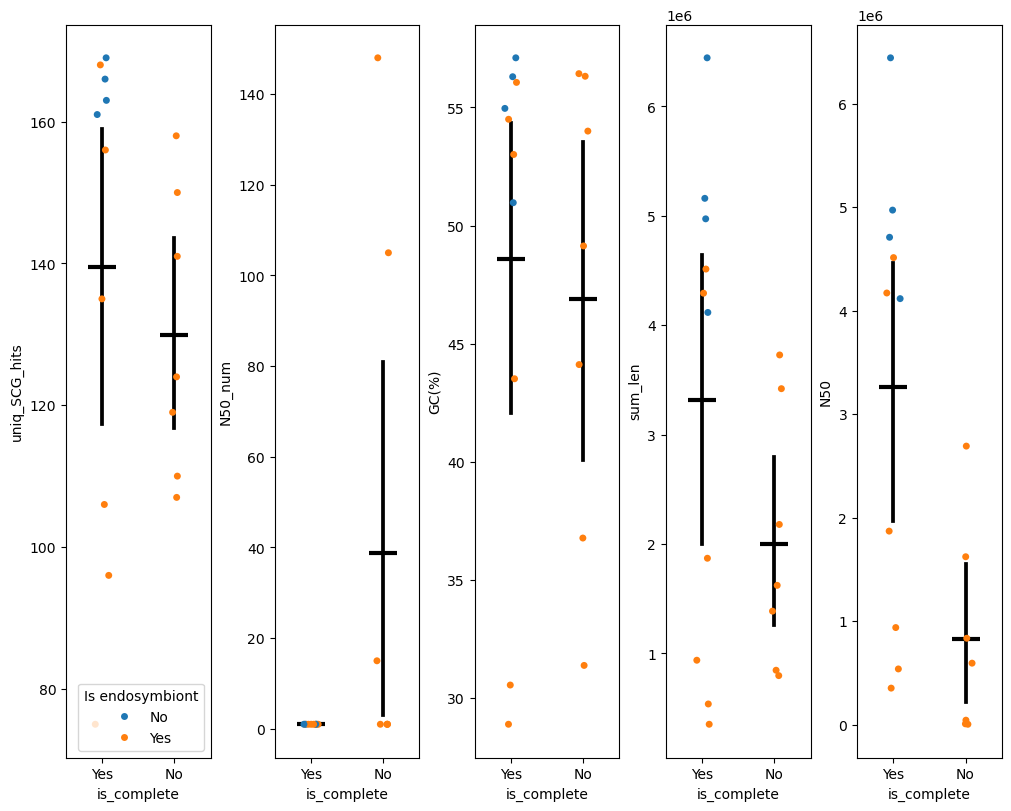

In [62]:
fig, axes = plt.subplots(1,5,constrained_layout=True)

sns.stripplot(data=df,x="is_complete",y="uniq_SCG_hits",hue="is_endosymb", ax = axes[0])
sns.pointplot(data=df,x="is_complete",y="uniq_SCG_hits",linestyle="none",errorbar="ci",marker="_",markersize=20,markeredgewidth=3,ax=axes[0],color="black")

sns.stripplot(data=df,x="is_complete",y="N50_num",hue="is_endosymb", ax = axes[1],legend=False)
sns.pointplot(data=df,x="is_complete",y="N50_num",linestyle="none", errorbar="ci", marker="_",markersize=20,markeredgewidth=3,ax=axes[1],color="black")

sns.stripplot(data=df,x="is_complete",y="GC(%)",hue="is_endosymb", ax = axes[2],legend=False)
sns.pointplot(data=df,x="is_complete",y="GC(%)",linestyle="none", errorbar="ci", marker="_",markersize=20,markeredgewidth=3,ax=axes[2],color="black")

sns.stripplot(data=df,x="is_complete",y="sum_len",hue="is_endosymb", ax = axes[3],legend=False)
sns.pointplot(data=df,x="is_complete",y="sum_len",linestyle="none", errorbar="ci", marker="_",markersize=20,markeredgewidth=3,ax=axes[3],color="black")

sns.stripplot(data=df,x="is_complete",y="N50",hue="is_endosymb", ax = axes[4],legend=False)
sns.pointplot(data=df,x="is_complete",y="N50",linestyle="none", errorbar="ci", marker="_",markersize=20,markeredgewidth=3,ax=axes[4],color="black")

handles, labels = axes[2].get_legend_handles_labels()
axes[0].legend(title="Is endosymbiont", loc='lower right')

fig.set_size_inches(10, 8)
plt.show()

Interestingly, the smallest genomes are marked as complete. Free-living species generally seem to have larger genomes, higher GC%, and more SCGs. To confirm this, we'll use a pooled t-test with unequal variances, with an alpha of 0.05.
There is also a large spread in N50 values, but (at least in the complete genomes) this is due to the difference in genome sizes, since the complete genomes are made up of only 1 or a few contigs, compared to the incomplete genomes which have many more.

In [64]:
endosymbiont = df.loc[df['is_endosymb'] == "Yes"]
free_living = df.loc[df['is_endosymb'] == "No"]
endosymbiont_complete = endosymbiont.loc[endosymbiont['is_complete'] == "Yes"]
free_living_complete = free_living.loc[free_living['is_complete'] == "Yes"]
print("Genome length:", stats.ttest_ind(endosymbiont_complete["sum_len"], free_living_complete["sum_len"], equal_var=False))
print("Unique SCG hits:", stats.ttest_ind(endosymbiont_complete["uniq_SCG_hits"], free_living_complete["uniq_SCG_hits"], equal_var=False))
print("GC(%):", stats.ttest_ind(endosymbiont["GC(%)"], free_living["GC(%)"], equal_var=False))

Genome length: TtestResult(statistic=np.float64(-3.4213571860576097), pvalue=np.float64(0.00956535107608002), df=np.float64(7.723131565657112))
Unique SCG hits: TtestResult(statistic=np.float64(-2.822074716053747), pvalue=np.float64(0.03589949131313596), df=np.float64(5.138946655919069))
GC(%): TtestResult(statistic=np.float64(-2.802659021903093), pvalue=np.float64(0.013422566284469082), df=np.float64(14.947693822688551))


All tests except GC(%) were performed only on the complete genomes, since incomplete genomes may cause anomalous values for genome size and content, that aren't representative of reality. These tests show that free-living species all have significantly higher genome lengths, unique SCG hits and GC(%) values than endosymbiotic species. It makes sense that they have longer genomes and higher SCG hits, since free-living species need all genes required for survival, whereas endosymbiotic species generally make use of the host's environment and enzymes. 

It might be possible that the different GC% is to improve stability of the genome in free-living species, but that's basically a guess at this point. We might be able to confirm this using GenomeSpot.

```sh
mkdir GenomeSpot
for f in data/genomes/*; do prodigal -i $f -a GenomeSpot/`basename ${f/.fna/.faa}`;done
cd GenomeSpot
python3.11
for f in *faa; do python -m genome_spot.genome_spot --models ~/data_bb3bcg20/bin/GenomeSPOT/models/ \
  --contigs ../data/genomes/${f/.faa/.fna} \
  --proteins $f \
  --output $f.genome_spot \
; done
echo "assembly_id\tpredicted_optimum_temp\tpredicted_temp_error" > temperatures.tsv
for f in *.tsv; do echo "${f/.faa.genome_spot.predictions.tsv/}" `grep -e "temperature_optimum" $f | cut -f2,3` >> temperatures.tsv; done
sed -ie "s/ /\t/g" temperatures.tsv
```
The version of Prodigal was V2.6.3 and of GenomeSpot 1.0.1



In [68]:
df2 = pd.read_table("GenomeSpot/temperatures.tsv")
df = pd.merge(df, df2, left_on="assembly_id", right_on="assembly_id")
df

,assembly_id,taxid,num_SCG_hits,uniq_SCG_hits,perc_comp,perc_redund,num_SCG_hits_after_len_filt,in_final_tree,GTDB_accession,GTDB_domain,...,sum_gap,N50,N50_num,Q20(%),Q30(%),AvgQual,GC(%),sum_n,predicted_optimum_temp,predicted_temp_error
0,Dickeya_dadantii_XJ12_GCF_030168535.1,NaN,167,163,97.09,2.33,162,Yes,NaN,NaN,...,0,4972118,1,0,0,0,56.30,0,30.979555,5.603338
1,Doolittlea_endobia_DEMHIR_GCF_900039485.1,NaN,110,110,63.95,0.00,105,Yes,NaN,NaN,...,0,834734,1,0,0,0,44.12,0,37.485427,6.984910
2,Gullanella_endobia_GEFVIR_GCF_900048035.1,NaN,106,106,61.63,0.00,105,Yes,NaN,NaN,...,0,938041,1,0,0,0,28.90,0,41.538674,7.712780
3,Mikella_endobia_mEPMAR_GCF_900048045.1,NaN,75,75,43.60,0.00,72,Yes,NaN,NaN,...,0,352837,1,0,0,0,30.56,0,NaN,NaN
4,Moranella_endobia_GCF_000364725.1,NaN,96,96,55.81,0.00,95,Yes,NaN,NaN,...,0,538203,1,0,0,0,43.52,0,42.333827,7.805572
5,Pectobacterium_cacticida_CFBP3628_GCF_036885195.1,NaN,170,169,98.84,0.58,167,Yes,NaN,NaN,...,0,4116584,1,0,0,0,50.97,0,28.326717,5.700592
6,Sodalis_endolongispinus_SOD1_GCF_018777395.1,NaN,167,158,97.09,5.81,152,Yes,NaN,NaN,...,0,2691569,1,0,0,0,56.43,0,31.235512,5.617332
7,Sodalis_glossinidius_morsitans_GCF_000010085.1,NaN,169,168,98.26,1.16,165,Yes,NaN,NaN,...,0,4171146,1,0,0,0,54.50,0,29.374622,5.682838
8,Sodalis_ligni_dw23_GCF_016865525.2,NaN,168,161,97.67,4.07,157,Yes,NaN,NaN,...,0,6443694,1,0,0,0,54.96,3,29.941791,5.670055
9,Sodalis_pierantonius_SOPE_GCF_000517405.1,NaN,164,156,95.35,5.81,153,Yes,NaN,NaN,...,0,4513140,1,0,0,0,56.06,0,31.008426,5.605400


All predicted optimum temperatures seem to be fairly similar. Maybe we can do some more statistics to correlate the two, but for now we'll carry on with other things.